# Introducción, objetivos y contenido
====================================================================================================================================

* Importación de librerías
* Carga de datos
    * Dataset de restaurantes unívocos
    * Dataset de YELP
        * Restaurants
        * User
        * Checkins
        * Reviews
        * Tips
        * Categorías y atributos
    * Dataset de GOOGLE
        * Restaurantes
        * Reviews
        * Categorías
* Preprocesamiento: gestión final de tipos de datos, valores nulos y duplicados, características
    * Datasets de YELP
    * Datasets de GOOGLE
    * Datasets COMBINADOS
        * Restaurants
        * User
        * Checkins
        * Reviews
        * Categorías
* Análisis de datos
    * Análisis de plantel de restaurantes (oferentes)
    * Análisis de performance de restaurantes
    * Análisis de plantel de usuarios (clientes)
    * Análisis de demanda
    * Análisis de preferencias de usuario
        * Categorías top
        * Atributos
        * Marcas top
        * Locaciones top
    * Análisis de participación del usuario
        * Involucramiento
        * Satisfacción
* Conclusiones

# Importación de librerías
====================================================================================================================================

In [1]:
import pandas as pd
import numpy as np

import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Carga de datos
=========================================================================================================

## Dataset de restaurantes unívocos
------------------------------------------------------------------------------------------------------

In [2]:
# Listado unívoco de locales de ambos datasets
dfgy_rest_uniques = pd.read_parquet('dfgy_rest_uniques.parquet')

## Datasets de YELP
------------------------------------------------------------------------------------------------------

In [3]:
# Yelp
yelp_rest = pd.read_parquet('dfy_rest.parquet')
yelp_user = pd.read_parquet('dfy_user.parquet')
yelp_checkins = pd.read_parquet('dfy_checkins.parquet')

In [4]:
# Review
yelp_reviews = pd.read_parquet('dfy_reviews.parquet')

In [5]:
# Tips
yelp_tips = pd.read_parquet('dfy_tips.parquet')

In [6]:
# Categorías y atributos
yelp_site_categories = pd.read_parquet('dfy_site_categories.parquet')
yelp_site_attributes = pd.read_parquet('dfy_attributes.parquet')

## Datasets de GOOGLE
------------------------------------------------------------------------------------------------------

In [7]:
# Restaurants
google_rest = pd.read_parquet('dfg_rest.parquet')

In [8]:
# Reviews
google_reviews = pd.read_parquet('dfg_reviews.parquet')

In [9]:
# Categorías y atributos
google_site_categories = pd.read_parquet('dfg_site_categories.parquet')

# Preprocesamiento
=========================================================================================================

## Datasets de YELP
------------------------------------------------------------------------------------------------------

### YELP reviews

In [61]:
print(yelp_reviews.info())
yelp_reviews.sample(2)
# Nota: el dataset constituye una muestra 1 millón de registros debido a que el dataset de reviews es mucho mayor. 
# A Efectos del EDA, se considera suficiente.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   review_id    1000000 non-null  object        
 1   user_id      1000000 non-null  object        
 2   business_id  1000000 non-null  object        
 3   stars        1000000 non-null  float64       
 4   useful       1000000 non-null  int64         
 5   funny        1000000 non-null  int64         
 6   cool         1000000 non-null  int64         
 7   text         1000000 non-null  object        
 8   date         1000000 non-null  datetime64[ns]
 9   year         1000000 non-null  int32         
 10  month        1000000 non-null  int32         
 11  year_month   1000000 non-null  object        
 12  polarity     1000000 non-null  float64       
 13  sentiment    1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(5)
mem

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,year_month,polarity,sentiment
213569,ugkr-SwX2WgnY7GuPae9cw,YGu0ii3MXXfpkjTg0cpjGA,EIKbEHnsVg6dcsWopW4lkg,3.0,0,0,0,Cool little place and the burgers are pretty r...,2016-09-07 17:29:02,2016,9,1609,0.6265,1
751977,9szo47UahIGOqTlv4lSu9Q,-FH9K-xkwdE25gH8lGGQ3w,tdd8AJscOtb8HF0aQ8hPew,5.0,1,0,2,"Was over in Maryville, IL installing a landsca...",2014-12-05 22:54:30,2014,12,1412,0.9808,1


In [11]:
dfy_reviews = yelp_reviews.copy()

dfy_reviews['source'] = 'yelp'
dfy_reviews = dfy_reviews[['source','business_id','user_id', 'date', 'month', 'year', 'stars', 'polarity', 'sentiment']]
dfy_reviews = dfy_reviews.rename(columns={'business_id': 'site_id', 'date':'datetime', 'stars':'rating'})

print(dfy_reviews.info())
dfy_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   source     1000000 non-null  object        
 1   site_id    1000000 non-null  object        
 2   user_id    1000000 non-null  object        
 3   datetime   1000000 non-null  datetime64[ns]
 4   month      1000000 non-null  int32         
 5   year       1000000 non-null  int32         
 6   rating     1000000 non-null  float64       
 7   polarity   1000000 non-null  float64       
 8   sentiment  1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 61.0+ MB
None


,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
405272,yelp,8KH3DMj32jkIZCZR_y1ufg,4TVBeZAZhra7AlGPEj31Ug,2013-07-27 12:14:15,7,2013,5.0,0.9583,1
364439,yelp,O1kxISHZDJj55d4G2Xoevg,Twq_lw6dU9p6cGFsRPVlGQ,2021-04-11 00:22:39,4,2021,5.0,0.0000,0


### YELP restaurants

In [12]:
print(yelp_rest.info())
yelp_rest.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212998 entries, 0 to 212997
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   business_id            212998 non-null  object 
 1   name                   212998 non-null  object 
 2   city                   212998 non-null  object 
 3   postal_code            212998 non-null  object 
 4   latitude               212998 non-null  float64
 5   longitude              212998 non-null  float64
 6   stars                  212998 non-null  float64
 7   review_count           212998 non-null  int64  
 8   is_open                212998 non-null  int64  
 9   state                  212998 non-null  object 
 10  state_city             212998 non-null  object 
 11  city_postalcode        212998 non-null  object 
 12  state_city_postalcode  212998 non-null  object 
 13  categories             133777 non-null  object 
 14  food                   133777 non-nu

,business_id,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food,price
90597,l-0G0774U1vrZQXg_uanuA,Seafood By Crushed Velvet,Belleville,62220,38.513790,-89.981826,4.0,38,0,IL,IL - Belleville,Belleville - 62220,IL - Belleville - 62220,Seafood,yes,1.333333
194257,wzEJ5wBW6-5lAP9wab_eZw,Philippine Grocery,Tampa,33635,28.031867,-82.646772,4.5,9,1,FL,FL - Tampa,Tampa - 33635,FL - Tampa - 33635,Specialty Food,yes,2.000000
161238,nUWed8AXq019fq2PLz4vmw,Society Hill Dermatology,Philadelphia,19107,39.944401,-75.158027,1.0,6,1,PA,PA - Philadelphia,Philadelphia - 19107,PA - Philadelphia - 19107,None,None,1.540984
186234,sy7ADvpBA7SfHwbY-Y_5gw,Valanni,Philadelphia,19107,39.946794,-75.162222,4.0,875,0,PA,PA - Philadelphia,Philadelphia - 19107,PA - Philadelphia - 19107,Tapas Bars,yes,1.540984
123037,Z4vlztrocJo9WWcL5TFeBA,Dunkin',Philadelphia,19136,40.050982,-75.010120,3.0,7,1,PA,PA - Philadelphia,Philadelphia - 19136,PA - Philadelphia - 19136,Food,yes,1.090909


In [13]:
dfy_rest = yelp_rest

dfy_rest['source'] = 'yelp'
dfy_rest = dfy_rest[['source','business_id', 'name', 'state', 'city', 'postal_code', 'price', 'stars', 'review_count']]
dfy_rest = dfy_rest.rename(columns={'business_id': 'site_id', 'stars':'rating_avg', 'review_count':'reviews_count'})

dfy_rest.dropna(subset=['price'], inplace=True)

# Agregado de fecha de inicio de acitividad
dfy_rest_date_start = dfy_reviews.groupby('site_id')['datetime'].min().reset_index()
dfy_rest = pd.merge(dfy_rest, dfy_rest_date_start, how='left', on=['site_id'])
dfy_rest = dfy_rest.rename(columns={'datetime': 'date_start'})

dfy_rest['year'] = dfy_rest['date_start'].dt.year
dfy_rest['month'] = dfy_rest['date_start'].dt.month

dfy_rest['state_city'] = dfy_rest['state'].str.cat(dfy_rest['city'], sep=' - ')
dfy_rest['city_postalcode'] = dfy_rest['city'].str.cat(dfy_rest['postal_code'], sep=' - ')
dfy_rest['state_city_postalcode'] = dfy_rest['state'].str.cat(dfy_rest['city'], sep=' - ').str.cat(dfy_rest['postal_code'], sep=' - ')

print(dfy_rest.info())
dfy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211084 entries, 0 to 211083
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 211084 non-null  object        
 1   site_id                211084 non-null  object        
 2   name                   211084 non-null  object        
 3   state                  211084 non-null  object        
 4   city                   211084 non-null  object        
 5   postal_code            211084 non-null  object        
 6   price                  211084 non-null  float64       
 7   rating_avg             211084 non-null  float64       
 8   reviews_count          211084 non-null  int64         
 9   date_start             128792 non-null  datetime64[ns]
 10  year                   128792 non-null  float64       
 11  month                  128792 non-null  float64       
 12  state_city             211084 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
44961,yelp,0g9XB5iLNje1B4UNbzqCPA,The Blue Crab Restaurant & Oyster Bar,LA,New Orleans,70124,1.500000,3.5,492,2013-09-04 22:34:08,2013.0,9.0,LA - New Orleans,New Orleans - 70124,LA - New Orleans - 70124
43061,yelp,djFvG5mn3PfG_SFpMxlzFQ,Penguin's Pub,PA,Warminster,18974,1.190476,3.0,7,2014-01-29 18:32:30,2014.0,1.0,PA - Warminster,Warminster - 18974,PA - Warminster - 18974


In [14]:
print(dfy_rest.info())
dfy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211084 entries, 0 to 211083
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 211084 non-null  object        
 1   site_id                211084 non-null  object        
 2   name                   211084 non-null  object        
 3   state                  211084 non-null  object        
 4   city                   211084 non-null  object        
 5   postal_code            211084 non-null  object        
 6   price                  211084 non-null  float64       
 7   rating_avg             211084 non-null  float64       
 8   reviews_count          211084 non-null  int64         
 9   date_start             128792 non-null  datetime64[ns]
 10  year                   128792 non-null  float64       
 11  month                  128792 non-null  float64       
 12  state_city             211084 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
52030,yelp,89UTItrZckA5ld9EQ8kFhg,Jnl Glass,CA,Santa Barbara,93103,1.166667,4.0,16,NaT,NaN,NaN,CA - Santa Barbara,Santa Barbara - 93103,CA - Santa Barbara - 93103
203350,yelp,pdtLdjKYw_wxzLb6JHNDAw,Panera Bread,TN,Nashville,37215,1.800000,2.5,40,2012-01-18 15:24:18,2012.0,1.0,TN - Nashville,Nashville - 37215,TN - Nashville - 37215


### YELP user

In [15]:
dfy_user =yelp_user.copy()
print(dfy_user.info())
dfy_user.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   review_count   int64         
 2   fans           int64         
 3   yelping_since  datetime64[ns]
 4   useful         int64         
 5   funny          int64         
 6   cool           int64         
 7   average_stars  float64       
 8   year           int32         
 9   month          int32         
 10  year_month     object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(2)
memory usage: 160.6+ MB
None


,user_id,review_count,fans,yelping_since,useful,funny,cool,average_stars,year,month,year_month
141644,N-1hL46EK8EeJTKhk8QTxw,3,0,2015-03-14 22:10:26,1,0,0,5.00,2015,3,1503
722844,2jX7Z0QmlbJRxoNl8V-1-Q,7,0,2012-02-25 05:13:18,0,0,0,4.29,2012,2,1202


In [16]:
# Selección de campos
dfy_user = dfy_user[['user_id', 'review_count', 'yelping_since', 'average_stars']]
dfy_user = dfy_user.rename(columns={'review_count':'reviews_count', 'yelping_since':'date_start', 'average_stars':'rating_avg'})

dfy_user['date_start'] = pd.to_datetime(dfy_user['date_start'], errors='coerce')
dfy_user.reset_index(drop=True, inplace=True)

dfy_user['year'] = dfy_user['date_start'].dt.year
dfy_user['month'] = dfy_user['date_start'].dt.month

dfy_user['source'] = 'yelp'
dfy_user.info()
dfy_user.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   reviews_count  int64         
 2   date_start     datetime64[ns]
 3   rating_avg     float64       
 4   year           int32         
 5   month          int32         
 6   source         object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 96.4+ MB


,user_id,reviews_count,date_start,rating_avg,year,month,source
1888119,MeR2VpL27-lGf451aPddFw,1,2021-10-16 03:31:27,5.00,2021,10,yelp
679458,MlbQPswfWeupUQaE0vAu4Q,9,2018-08-19 23:56:59,4.22,2018,8,yelp
336032,0ABOFbBrxWWFko58Gn3U2w,1,2015-01-01 18:10:05,5.00,2015,1,yelp
222628,maTSkTkRAbEDe0mAFoCTgQ,200,2012-01-05 13:28:07,3.88,2012,1,yelp
176522,ZNb7feLKB5d2d2vGW_aahg,3,2014-04-07 15:53:23,2.00,2014,4,yelp


### YELP checkin

In [17]:
print(yelp_checkins.shape)
yelp_checkins.sample(2)

(28668325, 19)


,business_id,date,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food,price,year,month
13261538,SZU9c8V2GuREDN5KgyHFJw,2018-11-24 20:14:36,Santa Barbara Shellfish Company,Santa Barbara,93101,34.408715,-119.685019,4.0,2404,1,CA,CA - Santa Barbara,Santa Barbara - 93101,CA - Santa Barbara - 93101,Seafood,yes,1.891304,2018,11
17496935,al3Ri6TEqa2rBzjHsn0T_g,2015-05-19 17:48:20,Merchant,New Orleans,70112,29.952739,-90.071173,4.0,649,0,LA,LA - New Orleans,New Orleans - 70112,LA - New Orleans - 70112,Bars,yes,1.555556,2015,5


In [18]:
dfy_checkins = yelp_checkins[['business_id', 'date']]
dfy_checkins = dfy_checkins.rename(columns={'business_id':'site_id', 'date':'datetime'})

#dfy_checkins['datetime'] = pd.to_datetime(dfy_checkins['date'])
dfy_checkins['year'] = dfy_checkins['datetime'].dt.year
dfy_checkins['month'] = dfy_checkins['datetime'].dt.month

dfy_checkins['source'] = 'yelp'

dfy_checkins = dfy_checkins[['source', 'site_id', 'datetime', 'year', 'month']]

In [19]:
print(dfy_checkins.info())
dfy_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 28668325 entries, 0 to 28715821
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 1.1+ GB
None


,source,site_id,datetime,year,month
14631201,yelp,VQcCL9PiNL_wkGf-uF3fjg,2014-01-12 21:46:06,2014,1
10699634,yelp,MtXqu_wQ6Jznsu7Pir8eiA,2015-06-13 00:10:11,2015,6


### YELP categories

In [20]:
yelp_site_categories.info()
yelp_site_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149643 entries, 0 to 149642
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   site_id     149643 non-null  object
 1   categories  149643 non-null  object
 2   food        149643 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


,site_id,categories,food
29526,zG3ijcNz5_KyxQb3w29OZg,Burgers,yes
116471,gM0HFwD_myHUAUSUN2boug,Beer,yes


In [21]:
dfy_categories = yelp_site_categories[['site_id', 'categories']]
dfy_categories['source'] = 'yelp'
dfy_categories = dfy_categories[['source', 'site_id', 'categories']]

dfy_categories.info()
dfy_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149643 entries, 0 to 149642
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      149643 non-null  object
 1   site_id     149643 non-null  object
 2   categories  149643 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


,source,site_id,categories
62664,yelp,7cJqiBsrddV_rNFBPHOTRA,Bars
60504,yelp,bg4byZlEDCUVbC16VHxjlA,Bars


### YELP attributes

In [22]:
dfy_attributes = yelp_site_attributes.copy()

print(dfy_attributes.shape)
dfy_attributes.sample(2)

(1206820, 2)


,business_id,attributes
83686,_p76U5dXBYtNDyJV4u2uYw,Alcohol
58695,HaS3s5CxmzZYw2vuqpI32w,BusinessParking


## Datasets GOOGLE
------------------------------------------------------------------------------------------------------

### GOOGLE reviews

In [23]:
print(google_reviews.info())
google_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346287 entries, 0 to 4346286
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_id          float64       
 1   gmap_id          object        
 2   state            object        
 3   datetime         datetime64[ns]
 4   rating           int64         
 5   vader_polarity   float64       
 6   vader_sentiment  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 232.1+ MB
None


,user_id,gmap_id,state,datetime,rating,vader_polarity,vader_sentiment
1003043,1.150035e+20,0x8809b1250638ee23:0x5c3b681dcdbd4037,IL,2020-08-31 05:13:01.038,5,0.6588,1
2876427,1.073786e+20,0x89aae09a6a7cddf1:0x9a82252680b16da0,NC,2017-11-22 05:44:26.744,4,0.2382,1


In [24]:
dfg_reviews = google_reviews
dfg_reviews['source'] = 'google'
dfg_reviews['month'] = dfg_reviews['datetime'].dt.month
dfg_reviews['year'] = dfg_reviews['datetime'].dt.year
dfg_reviews = dfg_reviews[['source', 'gmap_id','user_id', 'datetime', 'month', 'year', 'rating', 'vader_polarity', 'vader_sentiment']]
dfg_reviews = dfg_reviews.rename(columns={'gmap_id': 'site_id', 'vader_polarity':'polarity', 'vader_sentiment':'sentiment'})

In [25]:
dfg_reviews.sample(2)

,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
178406,google,0x87d428cff3f3adbb:0x77119ffc33f8fdd4,1.069978e+20,2020-12-08 18:17:40.789,12,2020,5,0.8070,1
307737,google,0x80dcaf45a49656df:0x99d7cac698af187d,1.079063e+20,2019-05-21 20:58:39.554,5,2019,5,0.9289,1


### GOOGLE restaurants

In [26]:
print(google_rest.info())
google_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 223485 entries, 2 to 274996
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            223485 non-null  object 
 1   address_full    223485 non-null  object 
 2   gmap_id         223485 non-null  object 
 3   latitude        223485 non-null  float64
 4   longitude       223485 non-null  float64
 5   avg_rating      223485 non-null  float64
 6   num_of_reviews  223485 non-null  int64  
 7   price           223485 non-null  float64
 8   address         223485 non-null  object 
 9   city            223485 non-null  object 
 10  postal_code     223485 non-null  object 
 11  state           223485 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 22.2+ MB
None


,name,address_full,gmap_id,latitude,longitude,avg_rating,num_of_reviews,price,address,city,postal_code,state
197650,Dunkin',"Dunkin', 1024 Main Rd, Holden, ME 04429",0x4cae5251343d8da3:0x487fcff814185c3c,44.736935,-68.627736,3.9,28,1.0,1024 Main Rd,Holden,4429,ME
134503,Super Wings & Philly,"Super Wings & Philly, 6855 Wilson Blvd Unit 24...",0x88e5b8a1d24f8a55:0x561fa0b5be8ccad6,30.271459,-81.756705,4.4,187,1.3,6855 Wilson Blvd Unit 24,Jacksonville,32210,FL


In [27]:
dfg_rest = google_rest
dfg_rest['source'] = 'google'
dfg_rest = dfg_rest[['source','gmap_id', 'name', 'state', 'city', 'postal_code', 'price', 'avg_rating', 'num_of_reviews']]
dfg_rest = dfg_rest.rename(columns={'gmap_id': 'site_id', 'avg_rating':'rating_avg', 'num_of_reviews':'reviews_count'})

# Agregado de fecha de inicio de acitividad
dfg_rest_date_start = dfg_reviews.groupby('site_id')['datetime'].min().reset_index()
dfg_rest = pd.merge(dfg_rest, dfg_rest_date_start, how='left', on=['site_id'])
dfg_rest = dfg_rest.rename(columns={'datetime': 'date_start'})

dfg_rest['year'] = dfg_rest['date_start'].dt.year
dfg_rest['month'] = dfg_rest['date_start'].dt.month

dfg_rest['state_city'] = dfg_rest['state'].str.cat(dfg_rest['city'], sep=' - ')
dfg_rest['city_postalcode'] = dfg_rest['city'].str.cat(dfg_rest['postal_code'], sep=' - ')
dfg_rest['state_city_postalcode'] = dfg_rest['state'].str.cat(dfy_rest['city'], sep=' - ').str.cat(dfg_rest['postal_code'], sep=' - ')


In [28]:
print(dfg_rest.info())
dfg_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223485 entries, 0 to 223484
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 223485 non-null  object        
 1   site_id                223485 non-null  object        
 2   name                   223485 non-null  object        
 3   state                  223485 non-null  object        
 4   city                   223485 non-null  object        
 5   postal_code            223485 non-null  object        
 6   price                  223485 non-null  float64       
 7   rating_avg             223485 non-null  float64       
 8   reviews_count          223485 non-null  int64         
 9   date_start             134644 non-null  datetime64[ns]
 10  year                   134644 non-null  float64       
 11  month                  134644 non-null  float64       
 12  state_city             223485 non-null  obje

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
92768,google,0x89c6c798844658d3:0x94a06943be1b543b,Wingstop,PA,Philadelphia,19104,2.0,3.3,8,NaT,NaN,NaN,PA - Philadelphia,Philadelphia - 19104,PA - Saint Petersburg - 19104
48090,google,0x808fcf3afbfab6ff:0xc4f7e30bd497daf9,The Pizza Box,CA,Milpitas,95035,1.0,4.2,118,NaT,NaN,NaN,CA - Milpitas,Milpitas - 95035,CA - Santa Barbara - 95035


### GOOGLE user (creación de dataset)

In [29]:
dfg_user = dfg_reviews.groupby(['user_id']).agg({'site_id': 'count', 'datetime': 'min', 'rating': 'mean'}).reset_index()
dfg_user = dfg_user.rename(columns={'site_id':'reviews_count', 'datetime':'date_start', 'rating':'rating_avg'})
dfg_user['year'] = dfg_user['date_start'].dt.year
dfg_user['month'] = dfg_user['date_start'].dt.month

dfg_user['source'] = 'google'
dfg_user.sample(2)


,user_id,reviews_count,date_start,rating_avg,year,month,source
2076451,1.144888e+20,1,2017-12-30 17:52:15.402,5.0,2017,12,google
1186444,1.083573e+20,2,2017-03-14 06:53:50.347,5.0,2017,3,google


### GOOGLE checkins (creación de dataset)

In [ ]:
dfy_checkins = yelp_checkins[['business_id', 'date']]
dfy_checkins = dfy_checkins.rename(columns={'business_id':'site_id', 'date':'datetime'})

#dfy_checkins['datetime'] = pd.to_datetime(dfy_checkins['date'])
dfy_checkins['year'] = dfy_checkins['datetime'].dt.year
dfy_checkins['month'] = dfy_checkins['datetime'].dt.month

dfy_checkins['source'] = 'yelp'

dfy_checkins = dfy_checkins[['source', 'site_id', 'datetime', 'year', 'month']]

In [30]:
dfg_checkins = dfg_reviews[['source', 'site_id', 'datetime', 'year', 'month']]

In [31]:
print(dfg_checkins.info())
dfg_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346287 entries, 0 to 4346286
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 132.6+ MB
None


,source,site_id,datetime,year,month
3108216,google,0x87b6630df0c667d1:0xca5b660c4b64a67a,2020-07-21 15:32:40.448,2020,7
770586,google,0x88c2ce6c7b7053fb:0x87756709cc7965d,2019-07-09 10:16:55.763,2019,7


### GOOGLE categories

In [32]:
google_site_categories.info()
google_site_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 626995 entries, 2 to 274996
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   site_id   626995 non-null  object
 1   category  626995 non-null  object
dtypes: object(2)
memory usage: 14.4+ MB


,site_id,category
241843,0x88e7717413597a6d:0xa14bde0db63328c4,Takeout Restaurant
49206,0x885b4168de571f7f:0xf602f21374fca703,Takeout Restaurant


In [33]:
dfg_categories = google_site_categories.copy()

dfg_categories.rename(columns={'category': 'categories'}, inplace=True)
dfg_categories['source'] = 'google'
dfg_categories = dfg_categories[['source', 'site_id', 'categories']]

dfg_categories.info()
dfg_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 626995 entries, 2 to 274996
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      626995 non-null  object
 1   site_id     626995 non-null  object
 2   categories  626995 non-null  object
dtypes: object(3)
memory usage: 19.1+ MB


,source,site_id,categories
142931,google,0x86254ac7e6a108bf:0x7c9cf805b25c7a5,Cajun restaurant
228244,google,0x88c2ebef96f84e4d:0xe0dbabbdfaf42dd1,Chinese restaurant


## Datasets COMBINADOS
------------------------------------------------------------------------------------------------------

### Dataset RESTAURANTS

In [34]:
# Filtrado
dfy_rest = dfy_rest[dfy_rest['site_id'].isin(dfgy_rest_uniques['business_id'])]
# Union
dfgy_rest = pd.concat([dfy_rest, dfg_rest])

print(dfgy_rest.info())
dfgy_rest.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 342834 entries, 3 to 223484
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 342834 non-null  object        
 1   site_id                342834 non-null  object        
 2   name                   342834 non-null  object        
 3   state                  342834 non-null  object        
 4   city                   342834 non-null  object        
 5   postal_code            342834 non-null  object        
 6   price                  342834 non-null  float64       
 7   rating_avg             342834 non-null  float64       
 8   reviews_count          342834 non-null  int64         
 9   date_start             247726 non-null  datetime64[ns]
 10  year                   247726 non-null  float64       
 11  month                  247726 non-null  float64       
 12  state_city             342834 non-null  object   

,source,site_id,name,state,city,postal_code,price,rating_avg,reviews_count,date_start,year,month,state_city,city_postalcode,state_city_postalcode
120256,google,0x87d8d3065c8d12f7:0xefe6a92e683bdd6d,Shack Breakfast & Lunch,MO,Valley Park,63122,1.25,4.3,6,NaT,NaN,NaN,MO - Valley Park,Valley Park - 63122,MO - Carmel - 63122
72345,google,0x89c67a228b04301f:0xfbaaceb06179411a,Sebastiano's Italian Restaurant And Pizzeria,PA,Reading,19606,2.00,4.6,306,2015-01-27 21:16:01.403,2015.0,1.0,PA - Reading,Reading - 19606,PA - Swansea - 19606


### Dataset USER

In [35]:
dfgy_user = pd.concat([dfy_user, dfg_user])

print(dfgy_user.info())
dfgy_user.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 4756911 entries, 0 to 2651313
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   reviews_count  int64         
 2   date_start     datetime64[ns]
 3   rating_avg     float64       
 4   year           int32         
 5   month          int32         
 6   source         object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 254.0+ MB
None


,user_id,reviews_count,date_start,rating_avg,year,month,source
873748,l4OEq08MVHmBFbXL_AUnkA,8,2013-05-13 19:40:51.000,4.13,2013,5,yelp
1910681,113346720525963739136.0,1,2020-07-25 12:40:00.107,3.00,2020,7,google


### Dataset CHECKINS

In [36]:
# Filtrado
dfy_checkins = dfy_checkins[dfy_checkins['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_checkins = pd.concat([dfy_checkins, dfg_checkins])

print(dfgy_checkins.info())
dfgy_checkins.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 28129090 entries, 0 to 4346286
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   source    object        
 1   site_id   object        
 2   datetime  datetime64[ns]
 3   year      int32         
 4   month     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 1.0+ GB
None


,source,site_id,datetime,year,month
24401257,yelp,qFVYd-IZ0dXIuMB4CeeGeg,2019-02-28 21:26:09,2019,2
21127091,yelp,ipZ7neK1bjBAUrCqyCvB_Q,2013-08-15 21:46:51,2013,8


### Dataset REVIEWS

In [37]:
# Filtrado
dfy_reviews = dfy_reviews[dfy_reviews['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_reviews = pd.concat([dfy_reviews, dfg_reviews])

print(dfgy_reviews.info())
dfgy_reviews.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 5204599 entries, 0 to 4346286
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   source     object        
 1   site_id    object        
 2   user_id    object        
 3   datetime   datetime64[ns]
 4   month      int32         
 5   year       int32         
 6   rating     float64       
 7   polarity   float64       
 8   sentiment  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 357.4+ MB
None


,source,site_id,user_id,datetime,month,year,rating,polarity,sentiment
710313,google,0x88c2c719aa56d153:0xeec2683bfef363f5,103143409321251192832.0,2019-07-24 21:09:34.826,7,2019,5.0,0.0000,0
3840723,google,0x8640c3d0f24bf367:0x9db82341874406a1,116200147309468073984.0,2019-12-26 20:17:38.020,12,2019,5.0,0.9313,1


### Dataset CATEGORIES

In [38]:
# Filtrado
dfy_categories = dfy_categories[dfy_categories['site_id'].isin(dfgy_rest_uniques['business_id'])]

# Union
dfgy_categories = pd.concat([dfy_categories, dfg_categories])

print(dfgy_categories.info())
dfgy_categories.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 744630 entries, 0 to 274996
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      744630 non-null  object
 1   site_id     744630 non-null  object
 2   categories  744630 non-null  object
dtypes: object(3)
memory usage: 22.7+ MB
None


,source,site_id,categories
115517,google,0x888e8fe36272ff59:0xe142190f13039348,Gas station
125946,yelp,ukfAtVvdBD41s-yJ6gOx3w,Food Delivery Services


# Análisis de datos
=========================================================================================================

## Análisis de plantel de restaurantes (oferentes)

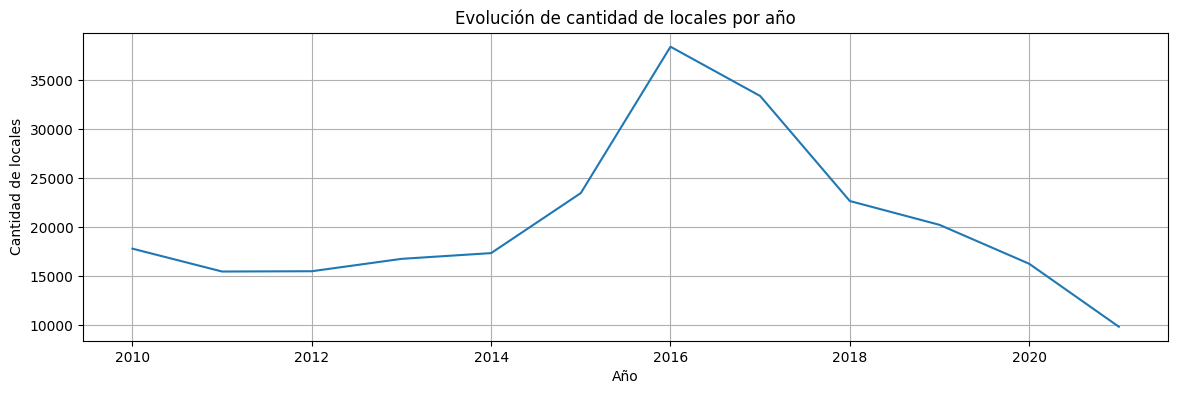

In [39]:
rest_evolution = dfgy_rest.groupby(['year']).agg({'site_id': 'count'}).reset_index()
rest_evolution = rest_evolution.loc[(rest_evolution['year'] >= 2010) & (rest_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=rest_evolution, x='year', y='site_id')
plt.title('Evolución de cantidad de locales por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de locales')
plt.grid(True)

Conclusiones:
* El gráfico muestra la cantidad de locales registrados en yelp y google a lo largo del tiempo, medido en años
* Se observan claramente las fases de:
    * Nacimiento, en 2010
    * Evolución y desarrollo, entre 2012 y 2014
    * Posicionamiento y estabilización en el mercado, entre 2015 y 2019 
    * Involución, en 2020 -- esto último causado por el covid19

## Análisis de performance de restaurantes

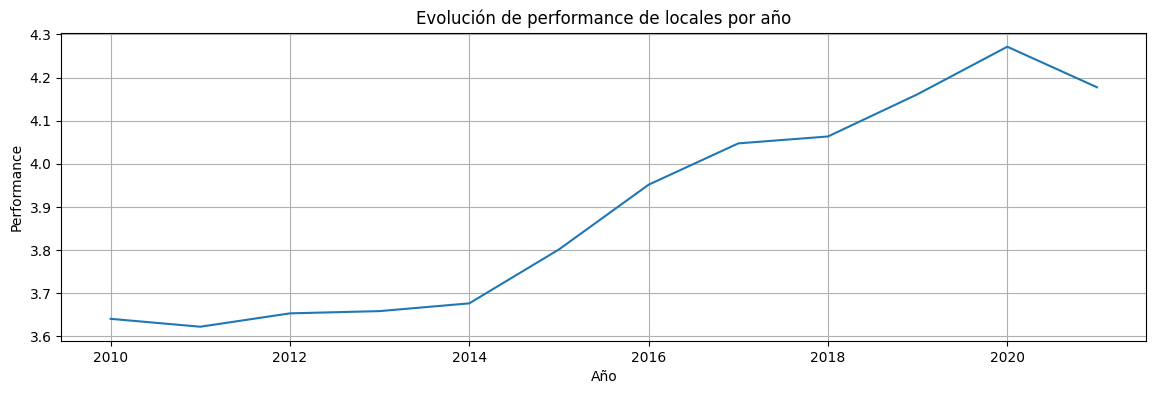

In [40]:
rest_performance = dfgy_rest.groupby(['year']).agg({'rating_avg': 'mean'}).reset_index()
rest_performance = rest_performance.loc[(rest_performance['year'] >= 2010) & (rest_performance['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=rest_performance, x='year', y='rating_avg')
plt.title('Evolución de performance de locales por año')
plt.xlabel('Año')
plt.ylabel('Performance')
plt.grid(True)

Conclusión:
* Se muestra el rating promedio a lo largo del tiempo de todos los locales registrados
* Se observa una clara tendencia a la mejora del rating, lo cual se traduce en el involucramiento de los oferentes para cuidar su clientela. 
* Esta tendencia tiene un alto impacto social, ya que contribuye a instalar la mentalidad de satisfacción del cliente

## Análisis de plantel de usuarios (clientes)

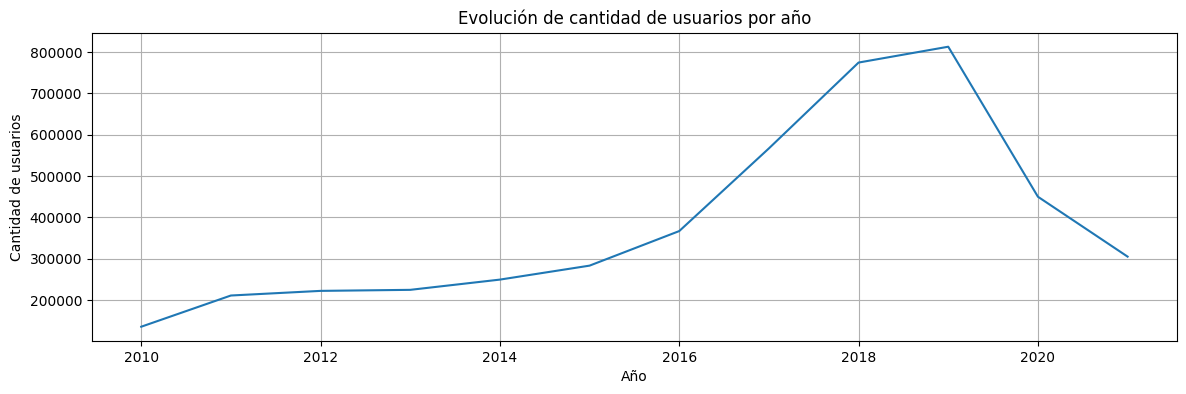

In [41]:
user_evolution = dfgy_user.groupby(['year']).agg({'user_id': 'count'}).reset_index()
user_evolution = user_evolution.loc[(user_evolution['year'] >= 2010) & (user_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=user_evolution, x='year', y='user_id')
plt.title('Evolución de cantidad de usuarios por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)

Conclusión:
* Se muestran a lo largo del tiempo, la cantidad de usuarios registrados en yelp y google
* Se observa una clara tendencia de aumento de usuarios
* Se observa una clara disminución a partir de 2019, esto último causado por el fenómeno de covid19

## Análisis de demanda

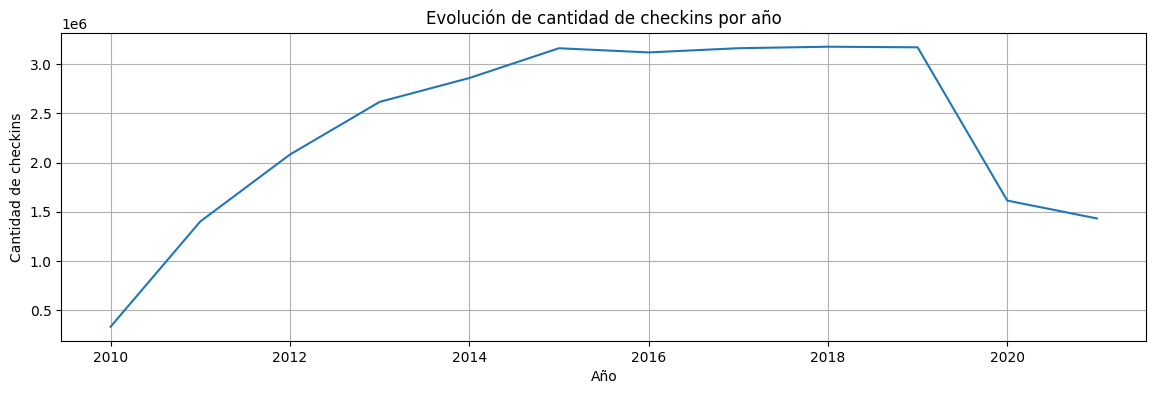

In [42]:
checkins_evolution = dfgy_checkins.groupby(['year']).agg({'datetime': 'count'}).reset_index()
checkins_evolution = checkins_evolution.loc[(checkins_evolution['year'] >= 2010) & (checkins_evolution['year'] <= 2021)]

plt.figure(figsize=(14, 4))
sns.lineplot(data=checkins_evolution, x='year', y='datetime')
plt.title('Evolución de cantidad de checkins por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de checkins')
plt.grid(True)

Conclusiones:
* El gráfico muestra la cantidad de check-ins registrados en yelp a lo largo del tiempo, medido en años
* La baja de actividad a partir del 2015 puede deberse a la fuerte entrada del mercado de delivery

## Análisis de preferencias de usuario

### Categorías top

In [43]:
dfgy_categories_food_edited = pd.read_csv('dataset_gy_categories_food_edited.csv')
dfgy_categories_food_edited

,Id,source,categories,supracategory,category_edited,category_edited2,category_edited3,category_edited4
0,1,yelp,Restaurants,general,Restaurants,Restaurants,restaurants,restaurant
1,2,yelp,Food,general,Food,Food,food,food
2,3,yelp,Burgers,burger,Burgers,Burgers,burgers,burgers
3,4,yelp,Fast Food,fast food,Fast Food,Fast Food,fast food,fast food
4,5,yelp,Sandwiches,burger,Sandwiches,Sandwiches,sandwiches,sandwiches
...,...,...,...,...,...,...,...,...
444,445,google,Yakiniku restaurant,regional,Yakiniku,Yakiniku,yakiniku,yakiniku
445,446,google,Yakisoba Restaurant,regional,Yakisoba,Yakisoba,yakisoba,yakisoba
446,447,google,Yakitori restaurant,regional,Yakitori,Yakitori,yakitori,yakitori
447,448,google,Yemenite restaurant,regional,Yemenite,Yemenite,yemenite,yemenite


In [44]:
dfgy_categories_final = pd.merge(dfgy_categories, dfgy_categories_food_edited, on='categories')
dfgy_categories_final

,source_x,site_id,categories,Id,source_y,supracategory,category_edited,category_edited2,category_edited3,category_edited4
0,yelp,MTSW4McQd7CbVtyjqoe9mw,Food,2,yelp,general,Food,Food,food,food
1,yelp,mWMc6_wTdE0EUBKIGXDVfA,Food,2,yelp,general,Food,Food,food,food
2,yelp,CF33F8-E6oudUQ46HnavjQ,Food,2,yelp,general,Food,Food,food,food
3,yelp,bBDDEgkFA1Otx9Lfe7BZUQ,Food,2,yelp,general,Food,Food,food,food
4,yelp,eEOYSgkmpB90uNA7lDOMRA,Food,2,yelp,general,Food,Food,food,food
...,...,...,...,...,...,...,...,...,...,...
549791,google,0x80ec1fd3d42c9afb:0x90a7b30788182fc4,Sfiha restaurant,373,google,regional,Sfiha,Sfiha,sfiha,sfiha
549792,google,0x87e4f11cdb194ced:0x9f69c8ed25a28eb2,Mutton barbecue restaurant,312,google,regional,Mutton barbecue,Mutton barbecue,mutton barbecue,mutton barbecue
549793,google,0x89c2f9331071005d:0x308aad6c8c05becd,Mutton barbecue restaurant,312,google,regional,Mutton barbecue,Mutton barbecue,mutton barbecue,mutton barbecue
549794,google,0x80deaa0b093ecaa5:0xca75dfda7eacf203,Steamboat restaurant,398,google,regional,Steamboat,Steamboat,steamboat,steamboat


Text(0, 0.5, 'SUPRA-Categoría')

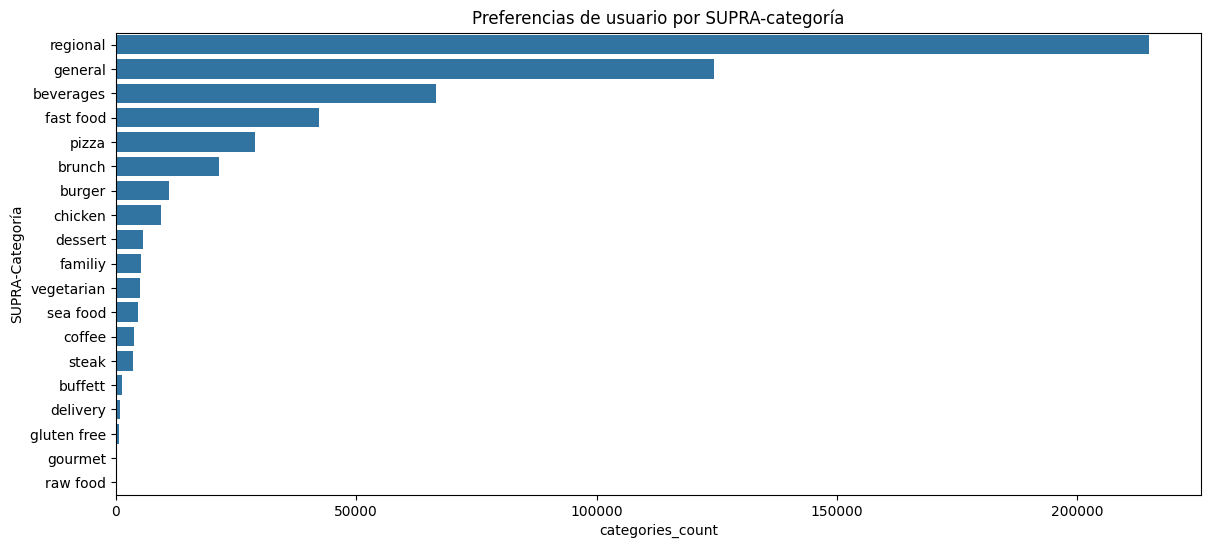

In [45]:
dfgy_categories_count = dfgy_categories_final.groupby('supracategory')['site_id'].count().reset_index()
dfgy_categories_count.rename(columns={'site_id':'categories_count'}, inplace=True)
dfgy_categories_count.sort_values('categories_count', ascending=False, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(x="categories_count", y="supracategory", data=dfgy_categories_count.head(20))
plt.title('Preferencias de usuario por SUPRA-categoría')
plt.ylabel('SUPRA-Categoría')

Conclusión:
* Se muestran las "supra-categorías" más buscadas
* La característica denominada "supra-categoría" se ha incorporado en el modelo para ahondar en el conocimiento del usuario
* Se observa que la supra-categoría de "beverages" que contiene bares y pubs, contiene a un tipo de producto que puede ser de interés para los clientes

Text(0, 0.5, 'Categoría')

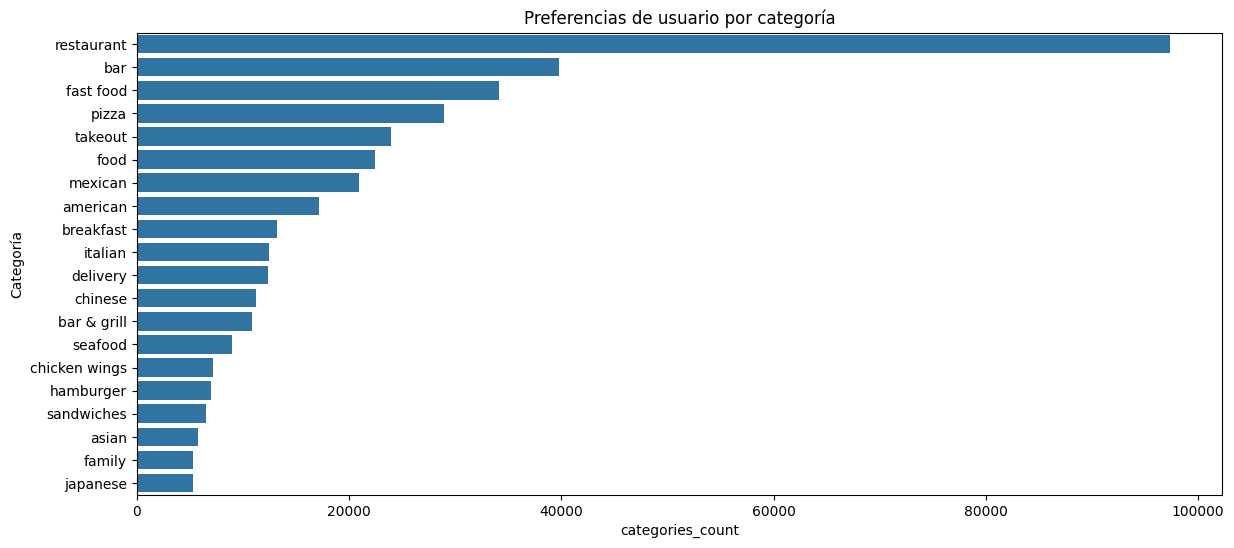

In [46]:
dfgy_categories_count = dfgy_categories_final.groupby('category_edited4')['site_id'].count().reset_index()
dfgy_categories_count.rename(columns={'site_id':'categories_count'}, inplace=True)
dfgy_categories_count.sort_values('categories_count', ascending=False, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(x="categories_count", y="category_edited4", data=dfgy_categories_count.head(20))
plt.title('Preferencias de usuario por categoría')
plt.ylabel('Categoría')

### Atributos top

Text(0, 0.5, 'Atributos')

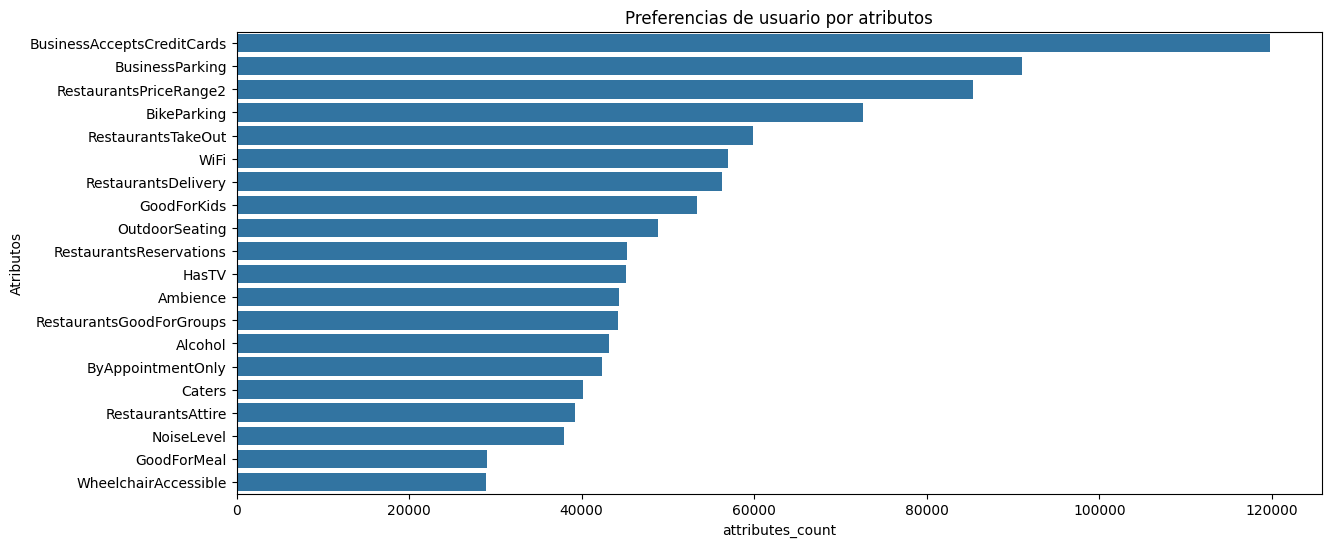

In [47]:
dfy_attributes_count = dfy_attributes.groupby('attributes')['business_id'].count().reset_index()
dfy_attributes_count.rename(columns={'business_id': 'attributes_count'}, inplace=True)
dfy_attributes_count.sort_values('attributes_count', ascending=False, inplace=True)
dfy_attributes_count


plt.figure(figsize=(14, 6))
sns.barplot(x="attributes_count", y="attributes", data=dfy_attributes_count.head(20))
plt.title('Preferencias de usuario por atributos')
plt.ylabel('Atributos')

Conclusión:
* Se observan los atributos más valorados por el mercado de USA
* El atributo líder es el que facilita el pago con tarjetas de crédito
* Resulta de gran interés para la clientela que el establecimiento cuente con parking

### Marcas top

In [48]:
dfgy_names_top = pd.merge(dfgy_checkins, dfgy_rest[['site_id', 'name']], how='left', on='site_id')
dfgy_names_top = dfgy_names_top.groupby('name')['site_id'].count().reset_index()

Text(0, 0.5, 'Marca')

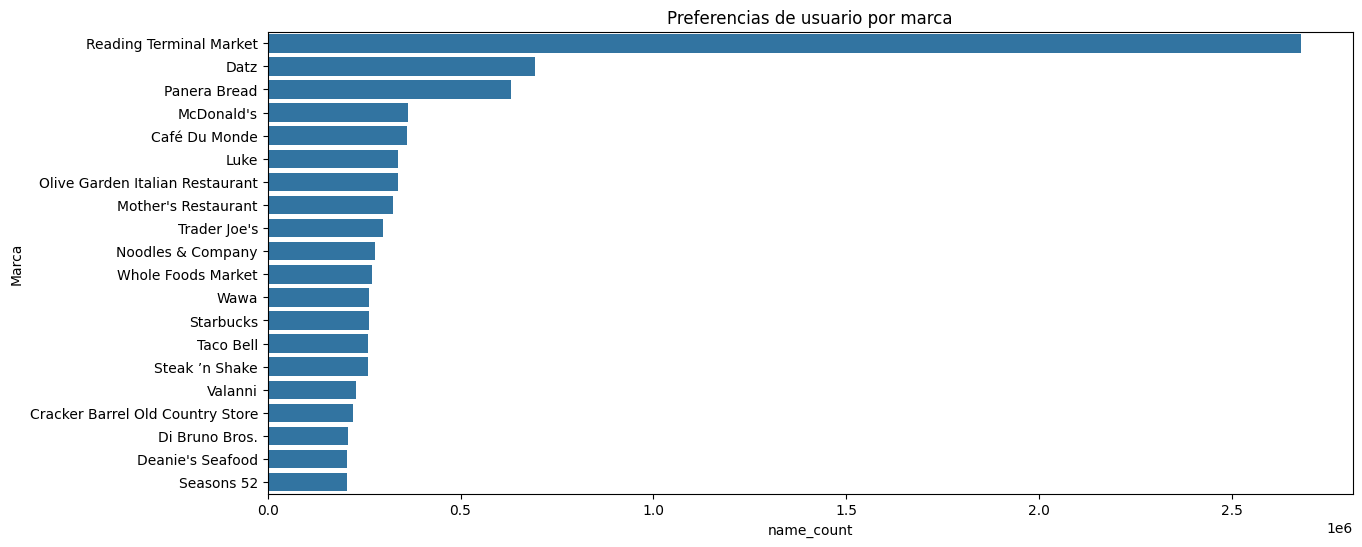

In [49]:
dfgy_names_top.rename(columns={'site_id': 'name_count'}, inplace=True)
dfgy_names_top = dfgy_names_top.sort_values('name_count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x="name_count", y="name", data=dfgy_names_top.head(20))
plt.title('Preferencias de usuario por marca')
plt.ylabel('Marca')

Conclusiones:
* Las dos marcas líderes como "Reading Terminal Market" y "Datz" ofrecen no solamente una experiencia gastronómica, sino un espacio social y de distensión. "Reading Terminal Market" es un espacio de paseo de compras y adyacentemente cuenta con un mercado gastronómico. Esta variable debe tenerse dentro de los atributos considerados para un sistema de recomendación
* Las dos marcas que le siguen son cafeterías, y luego sigue una marca de comidas rápidas ("McDonalds), para continuar con otros mercados de comida que ofrecen paseos
* Lo notable de esto es que no hay ningún restaurante tradicional dentro de las primeras diez marcas 

### Locaciones top

In [50]:
checkin_locations = pd.merge(dfgy_checkins, dfgy_rest[['site_id', 'state_city_postalcode']], on='site_id', how='inner')

In [51]:
checkin_locations = checkin_locations.loc[(checkin_locations['year'] >= 2010) & (checkin_locations['year'] <= 2021)]

In [52]:
checkin_locations.sample(2)

,source,site_id,datetime,year,month,state_city_postalcode
25848480,yelp,Iw8uqNPxviwcgxtruAx_LA,2016-04-15 21:52:56,2016,4,PA - Philadelphia - 19102
74159105,yelp,sfOsBQzmxnqal8N_PfwpJQ,2019-02-17 02:18:06,2019,2,AZ - Tucson - 85713


In [53]:
locations_top = checkin_locations.groupby(['state_city_postalcode']).agg({'datetime':'count'})
locations_top.rename(columns={'datetime':'checkins_count'}, inplace=True)
locations_top = locations_top.reset_index()
locations_top = locations_top.sort_values(by='checkins_count', ascending=False)

locations_top.head(10)

,state_city_postalcode,checkins_count
81756,PA - Philadelphia - 19107,5418950
37098,LA - New Orleans - 70130,4070500
10153,CA - Santa Barbara - 93101,2950218
81753,PA - Philadelphia - 19103,2018347
87402,TN - Nashville - 37203,1571728
37085,LA - New Orleans - 70116,1446594
81791,PA - Philadelphia - 19147,1340205
37084,LA - New Orleans - 70115,1308229
81755,PA - Philadelphia - 19106,1273744
32124,IN - Indianapolis - 46204,1241412


Text(0, 0.5, 'Locación')

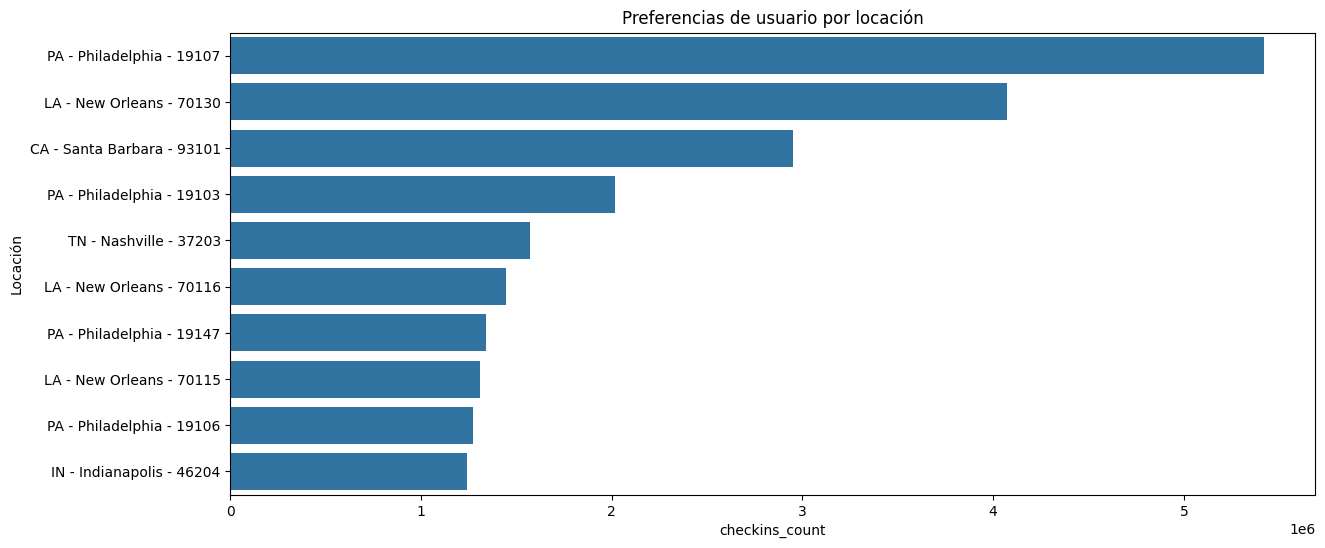

In [54]:
plt.figure(figsize=(14, 6))
sns.barplot(x="checkins_count", y="state_city_postalcode", data=locations_top.head(10))
plt.title('Preferencias de usuario por locación')
plt.ylabel('Locación')

Conclusiones:
* El gráfico de barras horizontales muestra la cantidad acumulada de check-ins, por locación (Estado - Ciudad - Código postal)
* Las locaciones líderes se encuentran en las ciudades de Philadelphia, New Orleans y Santa Barbara

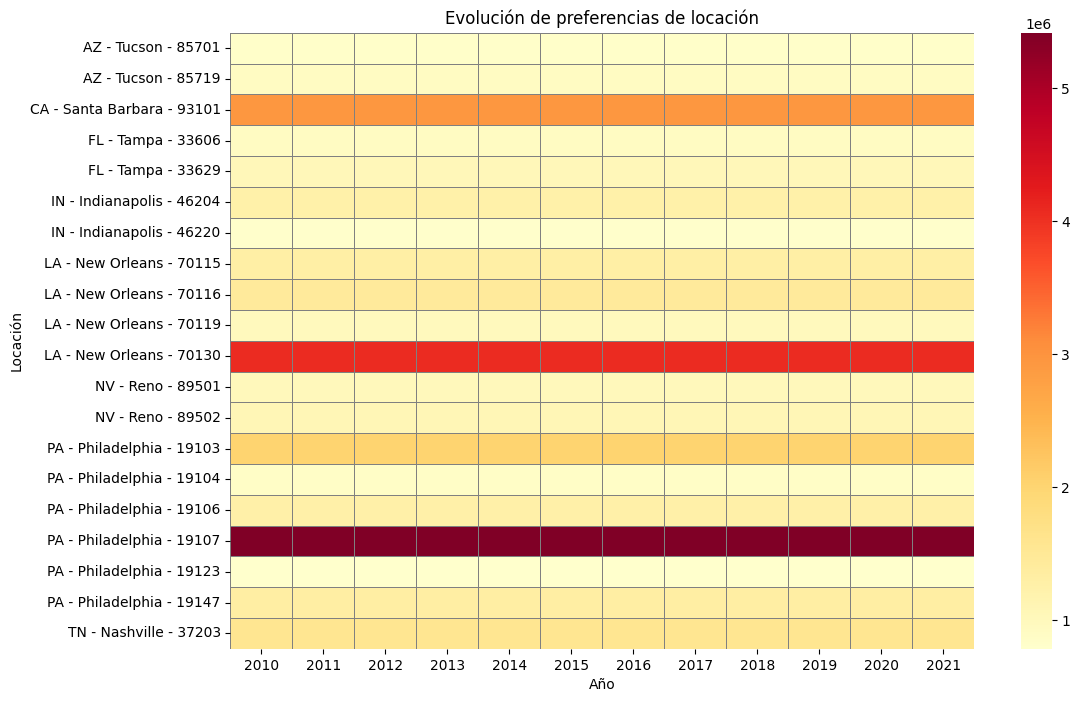

In [55]:
locations_top10 = locations_top.head(20)
locations_top_evol = pd.merge(checkin_locations, locations_top10, on='state_city_postalcode')
locations_top_evol_map = locations_top_evol.pivot_table(index='state_city_postalcode', columns='year', values='checkins_count', aggfunc='max')

plt.figure(figsize=(12, 8))
sns.heatmap(locations_top_evol_map, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Evolución de preferencias de locación')
plt.xlabel('Año')
plt.ylabel('Locación')
plt.yticks(rotation=0)
plt.show()

Conclusiones:
* El mapa de calor muestra la evolución anual de los check-ins, por locación
* Se muestran las 20 locaciones más visitadas
* Las ciudades de Philadelphia, New Orleans y Santa Bárbara lideran el podio en diversos sitios

## Análisis de participación del usuario

### Involucramiento

In [56]:
customer_engagement = dfgy_reviews.groupby(['year']).agg({'datetime':'nunique', 'user_id':'nunique', 'site_id':'nunique'}).reset_index()
customer_engagement.rename(columns={'datetime':'reviews_count', 'user_id':'users_count', 'site_id':'sites_count'}, inplace=True)
customer_engagement['reviews_per_user'] = customer_engagement['reviews_count'] / customer_engagement['users_count']
customer_engagement['reviews_per_site'] = customer_engagement['reviews_count'] / customer_engagement['sites_count']

customer_engagement = customer_engagement.loc[(customer_engagement['year'] >= 2010) & (customer_engagement['year'] <= 2021)]
customer_engagement['year'] = customer_engagement['year'].astype(int)

customer_engagement

,year,reviews_count,users_count,sites_count,reviews_per_user,reviews_per_site
8,2010,20627,12087,8892,1.706544,2.319726
9,2011,36781,22105,14868,1.663922,2.473836
10,2012,47374,30459,20147,1.555337,2.351417
11,2013,64513,42954,25244,1.501909,2.555578
12,2014,85133,60275,30285,1.412410,2.811062
13,2015,131421,96712,45792,1.358890,2.869955
14,2016,300939,224901,80914,1.338095,3.719245
15,2017,666497,526146,107830,1.266753,6.180998
16,2018,1037783,828240,119870,1.252998,8.657571
17,2019,1284198,998926,125015,1.285579,10.272351


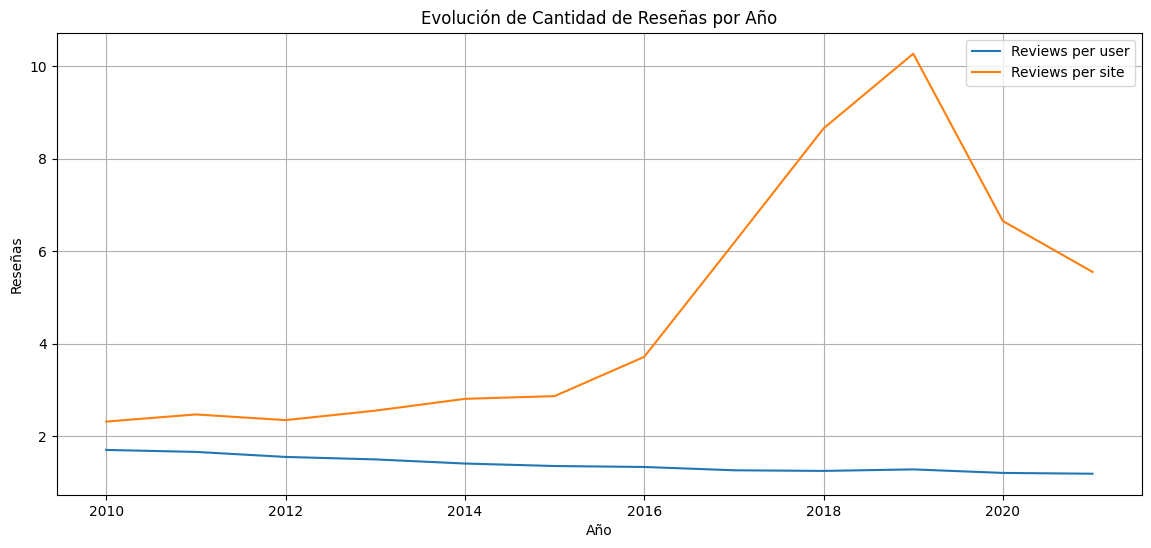

In [57]:
plt.figure(figsize=(14, 6))

sns.lineplot(customer_engagement, x='year', y='reviews_per_user', label='Reviews per user')
sns.lineplot(customer_engagement, x='year', y='reviews_per_site', label='Reviews per site')

plt.title('Evolución de Cantidad de Reseñas por Año')
plt.xlabel('Año')
plt.ylabel('Reseñas')
plt.legend()
plt.grid(True)

plt.show()

Conclusión:
* Se muestran los promedios de reseñas por usuario y por local, respectivamente
* Se observa una leve tendencia a disminuir la cantidad de reseñas promedio por usuario
* Se obswerva una amplica tendencia a recibir más reseñas por local

### Satisfacción

In [58]:
customer_satisfaction = dfgy_reviews.groupby(['year']).agg({'rating':'mean', 'polarity':'mean'}).reset_index()
customer_satisfaction = customer_satisfaction.loc[(customer_satisfaction['year'] >= 2010) & (customer_satisfaction['year'] <= 2021)]

customer_satisfaction

,year,rating,polarity
8,2010,3.735321,0.731112
9,2011,3.731456,0.696383
10,2012,3.764233,0.682346
11,2013,3.759461,0.674966
12,2014,3.784492,0.662731
13,2015,3.816047,0.620421
14,2016,3.968633,0.562695
15,2017,4.101837,0.544397
16,2018,4.156560,0.544914
17,2019,4.201568,0.547265


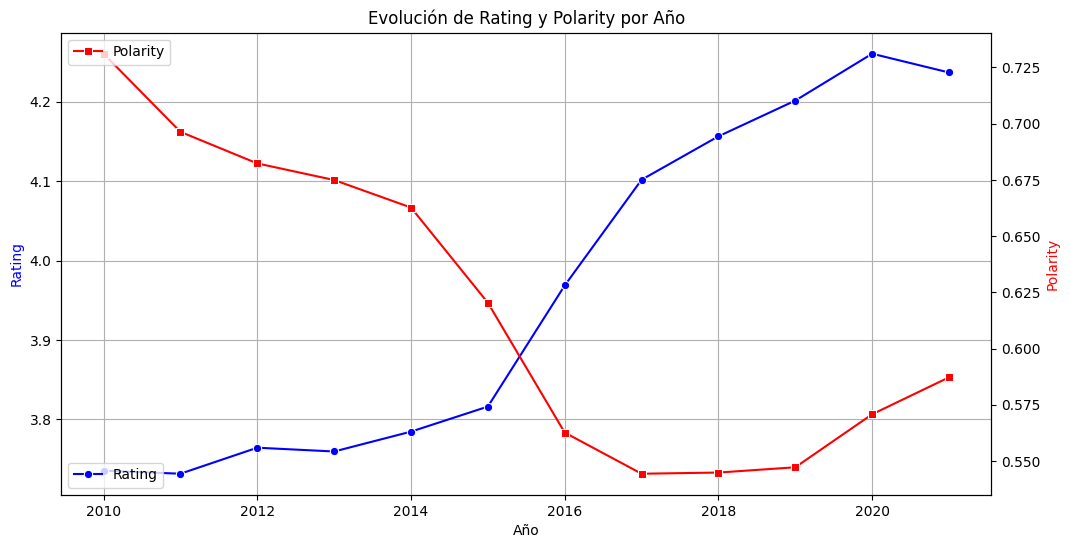

In [59]:
plt.figure(figsize=(12, 6))

ax1 = sns.lineplot(data=customer_satisfaction, x='year', y='rating', color='blue', marker='o', label='Rating')

plt.xlabel('Año')
ax1.set_ylabel('Rating', color='blue')
plt.title('Evolución de Rating y Polarity por Año')
plt.grid(True)

ax2 = ax1.twinx()
sns.lineplot(data=customer_satisfaction, x='year', y='polarity', color='red', marker='s', label='Polarity', ax=ax2)
ax2.set_ylabel('Polarity', color='red')

ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

plt.show()

Concllusión:
* Se muestra la evolución anual de promedios de rating y polaridad del análisis de sentimientos preliminar
* SE observa claramente la mejora de la satisfacción del cliente a lo largo del tiempo
* Se observa una disminución e inicio de estabilización de la polaridad, lo cual es un indicador de una participación activa y proactiva del usuario en las reseñas

# Conclusiones
====================================================================================================================================

## FASE DE ETL (EXTRACTION, TRANSFORMATION AND LOAD OF DATA)

Debido a la gran cantidad de información y necesidad de procesamiento, la fase de ETL se realizó en cinco archivos diferentes:
* DS_PjFinal_yelp1_sites_checkins_users
* DS_PjFinal_yelp2_reviews
* DS_PjFinal_google1_sites
* DS_PjFinal_google2_reviews
* DS_PjFinal_ETL_SitesUniques

### Diagrama simple de estructura de datos

<div style="text-align:center;">
    <img src="/Users/Juan/Documents/Academics/DataScience/PjFinal/DataStructureSimple.png" alt="Texto alternativo" width="1000" height="1000">
</div>

### Diagrama completo de estructura de datos

<div style="text-align:center;">
    <img src="/Users/Juan/Documents/Academics/DataScience/PjFinal/DataStructureComplete.png" alt="Texto alternativo" width="1000" height="1000">
</div>

## FASE DE EDA (EXPLORATORY DATA ANALYSIS) 

El EDA se ha basado en el análisis de oferta y demanda del dataset conjunto de Yelp y Google, así como el análisis de preferencias de usuarios, en función de conocer los primeros datos del mercado y buscar oportunidades y soluciones para propuesta del modelo de machine learning a presentar como prooducto final.

### FASE DE PRE-PROCESAMIENTO DE DATOS

El pre-procesamiento de datos consistió en las siguientes tareas:
* Gestión de tipos de datos
* Gestión de valores nulos
* Gestión de valores duplicados
* Gestión de características: eliminación de campos innecesarios y agregado de campos auxiliares 

Observaciones respecto al pre-procesamiento de datos:
* Se ha utilizado un dataset de códigos postales para corregir el dataset original de "business", ya que se detectó un error en el dataset original. 
* No se encontraron grandes cantidades de valores nulos, y no se encontraron duplicados que afecten a los datos. 
* Se modificaron algunos tipos de datos, sobre todo de aquellos campos de valor tipo "fecha"
* Se agregaron algunas características o campos auxiliares para facilitar el posterior agrupamiento y visualización de datos
* En particular, las modificaciones específicas que se han realizado son las siguientes:
    * Corrección de zip codes
    * Creación de precios en 
    * Creación de campo de "supracategorías" para agrupamiento de categorías de comida
    * Creación de listado único de restaurantes, combinando listado de ambas fuentes (Yelp y Google)

### FASE DE ANALISIS DE DATOS

Respecto al análisis de datos, se ha considerado estudiar el mercado a través de la oferta y demanda, y las preferencias del usuario. 
* Para valorizar la oferta, se ha considerado la cantidad de locales registrados en yelp
* Para valorizar la demanda, se ha considerado la cantidad de check-ins registrados
* Para conocer las preferencias del usuario, se consideran también los check-ins agrupados por categorías, marcas y locaciones

### CONSIDERACIONES PARA EL PRODUCTO FINAL

El interés específico de este análisis deviene en la definición de inputs y outputs a considerar en el modelo de Machine Learning, para luego definir los KPIs del proyecto, dashboard y producto final a presentar al cliente.

Inputs a considerar:
* Supra-categorías de comida
* Categorías de comida
* Atributos
* Marcas
* Locaciones (estado, ciudad y código postal)
* Precio

Outputs a considerar:
* Proyección de ventas
* Proyección de check-ins
* Proyección de cantidad de reseñas
* Proyección de valoracióin de reseñas
* Proyección de satisfacción del cliente
* Proyección de performance del site